Este script contiene un análisis exploratorio de una competencia realizada en www.kaggle.com en 2024 en dataton en el cual debía realizar un analisis y predición de pacientes con cancer a partir de una base de datos.

Importación de librerias y datos

In [30]:

# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', 100)

# Se cargan los datos en entranamiento y prueba
train = pd.read_csv('C:\\Users\\GIOSAPHAT\\Documents\\python_proyects\\topicos_II\\data\\train.csv')
test = pd.read_csv('C:\\Users\\GIOSAPHAT\\Documents\\python_proyects\\topicos_II\\data\\test.csv')

train.drop(columns=['patient_id'],inplace=True)
test.drop(columns=['patient_id'],inplace=True)

Exploración de los datos

In [31]:
# Carga de datasets
print("=== DIMENSIONES DE LOS DATASETS ===")
print(f"Dataset de entrenamiento: {train.shape}")
print(f"Dataset de test: {test.shape}")

=== DIMENSIONES DE LOS DATASETS ===
Dataset de entrenamiento: (12906, 82)
Dataset de test: (5792, 81)


Primeros filas de los datasets

In [32]:
#train_df.head()
# Primeras filas de ambos datasets
print("=== PRIMERAS 5 FILAS - TRAIN ===")
display(train.head())

print("\n=== PRIMERAS 5 FILAS - TEST ===")
display(test.head())

=== PRIMERAS 5 FILAS - TRAIN ===


,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.623810,3.098095,54.564286,120533.83330,3.


=== PRIMERAS 5 FILAS - TEST ===


,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN,Midwest,East North Central,5441.435484,85.620968,40.880328,12.732258,14.088710,10.659677,11.625806,11.208065,15.619355,12.322581,8.409677,3.343548,49.154839,50.845161,55.175806,13.982258,24.266129,6.583871,3.073226,52.980645,66187.22807,1.611290,1.277419,2.645161,3.853226,3.172581,13.275806,12.633871,21.485484,16.717742,15.238710,8.070968,23.309677,33553.43333,84.112903,2064.741935,152749.5370,825.122449,23.895455,12.429032,40.667742,28.959677,11.895161,6.046774,17.941935,35.591379,63.303226,3.406557,10.655357,5.551786,94.793548,0.364516,0.303226,0.119355,0.009677,0.770968,3.630645,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C787,NaN,NaN,South,South Atlantic,19613.820510,1555.107692,49.107692,8.069231,8.587179,10.684615,11.302564,10.971795,15.823077,15.902564,11.828205,6.815385,49.658974,50.341026,44.800000,17.779487,29.102564,8.310256,2.917105,46.665789,64711.71053,3.873684,2.044737,3.807895,4.239474,4.242105,9.347368,13.018421,17.373684,12.889474,14.442105,14.702632,29.144737,34678.61538,68.673684,8502.230769,265860.6053,1343.394737,34.957895,8.379487,26.558974,30.200000,22.100000,12.764103,34.864103,43.250000,57.035897,5.002632,11.564103,0.005128,78.217949,10.889744,3.453846,0.187179,0.076923,1.841026,5.328205,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,C773,NaN,NaN,West,Pacific,43030.500000,2048.578261,38.852174,11.306522,12.897826,14.121739,13.532609,13.160870,13.378261,11.473913,6.380435,3.736957,49.052174,50.947826,48.504348,10.117391,36.408696,4.969565,3.674783,59.219565,86330.39130,2.226087,1.528261,2.897826,2.747826,3.173913,6.647826,9.617391,15.965217,13.589130,19.752174,21.847826,41.600000,34317.82609,61.397826,12609.260870,572606.5000,1778.000000,34.595652,17.491304,22.656522,29.263043,20.200000,10.404348,30.604348,46.208696,63.154348,6.197826,15.708696,0.015217,38.708696,3.963043,25.565217,1.193478,0.269565,18.858696,11.426087,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C779,NaN,NaN,West,Pacific,43030.500000,2048.578261,38.852174,11.306522,12.897826,14.121739,13.532609,13.160870,13.378261,11.473913,6.380435,3.736957,49.052174,50.947826,48.504348,10.117391,36.408696,4.969565,3.674783,59.219565,86330.39130,2.226087,1.

Información del dataset de entrenamiento y prueba, nombres de columnas, tipos datos.

In [33]:
# Información general de los datasets
print("=== INFORMACIÓN DEL DATASET DE ENTRENAMIENTO ===")
print(train.info())

print("\n=== INFORMACIÓN DEL DATASET DE TEST ===")
print(test.info())

=== INFORMACIÓN DEL DATASET DE ENTRENAMIENTO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_race                           6521 non-null   object 
 1   payer_type                             11103 non-null  object 
 2   patient_state                          12855 non-null  object 
 3   patient_zip3                           12906 non-null  int64  
 4   patient_age                            12906 non-null  int64  
 5   patient_gender                         12906 non-null  object 
 6   bmi                                    3941 non-null   float64
 7   breast_cancer_diagnosis_code           12906 non-null  object 
 8   breast_cancer_diagnosis_desc           12906 non-null  object 
 9   metastatic_cancer_diagnosis_code       12906 non-null  object 
 10  metastatic_first_nove

In [34]:
# Comparación de columnas entre train y test
print("=== COMPARACIÓN DE COLUMNAS ===")
train_cols = set(train.columns)
test_cols = set(test.columns)

print(f"Columnas en train pero no en test: {train_cols - test_cols}")
print(f"Columnas en test pero no en train: {test_cols - train_cols}")
print(f"Columnas comunes: {len(train_cols & test_cols)}")

# Verificar si la variable objetivo está presente
print(f"\n¿Variable 'DiagPeriodL90D' en train?: {'DiagPeriodL90D' in train.columns}")
print(f"¿Variable 'DiagPeriodL90D' en test?: {'DiagPeriodL90D' in test.columns}")

=== COMPARACIÓN DE COLUMNAS ===
Columnas en train pero no en test: {'DiagPeriodL90D'}
Columnas en test pero no en train: set()
Columnas comunes: 81

¿Variable 'DiagPeriodL90D' en train?: True
¿Variable 'DiagPeriodL90D' en test?: False


In [35]:
# Análisis de tipos de datos
print("=== DISTRIBUCIÓN DE TIPOS DE DATOS ===")
def analyze_dtypes(df, dataset_name):
    dtype_counts = df.dtypes.value_counts()
    print(f"\n{dataset_name}:")
    for dtype, count in dtype_counts.items():
        print(f"  {dtype}: {count} columnas")
    
    # Detalle de columnas categóricas
    categorical_cols = df.select_dtypes(include=['object']).columns
    print(f"\n  Columnas categóricas ({len(categorical_cols)}):")
    for col in categorical_cols:
        print(f"    - {col}")

analyze_dtypes(train, "TRAIN")
analyze_dtypes(test, "TEST")

=== DISTRIBUCIÓN DE TIPOS DE DATOS ===

TRAIN:
  float64: 68 columnas
  object: 11 columnas
  int64: 3 columnas

  Columnas categóricas (11):
    - patient_race
    - payer_type
    - patient_state
    - patient_gender
    - breast_cancer_diagnosis_code
    - breast_cancer_diagnosis_desc
    - metastatic_cancer_diagnosis_code
    - metastatic_first_novel_treatment
    - metastatic_first_novel_treatment_type
    - Region
    - Division

TEST:
  float64: 68 columnas
  object: 11 columnas
  int64: 2 columnas

  Columnas categóricas (11):
    - patient_race
    - payer_type
    - patient_state
    - patient_gender
    - breast_cancer_diagnosis_code
    - breast_cancer_diagnosis_desc
    - metastatic_cancer_diagnosis_code
    - metastatic_first_novel_treatment
    - metastatic_first_novel_treatment_type
    - Region
    - Division


In [36]:
# Análisis de valores únicos en variables categóricas
print("=== VALORES ÚNICOS EN VARIABLES CATEGÓRICAS ===")
categorical_cols_train = train.select_dtypes(include=['object']).columns

for col in categorical_cols_train:
    train_unique = train[col].nunique()
    test_unique = test[col].nunique() if col in test.columns else "N/A"
    
    print(f"\n{col}:")
    print(f"  Train: {train_unique} valores únicos")
    print(f"  Test: {test_unique} valores únicos")
    
#    if train_unique <= 10:  # Mostrar categorías si son pocas
#        print(f"  Categorías en train: {sorted(train[col].unique())}")
#        if col in test.columns and test_unique <= 10:
#            print(f"  Categorías en test: {sorted(test[col].dropna().unique())}")

=== VALORES ÚNICOS EN VARIABLES CATEGÓRICAS ===

patient_race:
  Train: 5 valores únicos
  Test: 5 valores únicos

payer_type:
  Train: 3 valores únicos
  Test: 3 valores únicos

patient_state:
  Train: 50 valores únicos
  Test: 46 valores únicos

patient_gender:
  Train: 1 valores únicos
  Test: 1 valores únicos

breast_cancer_diagnosis_code:
  Train: 50 valores únicos
  Test: 46 valores únicos

breast_cancer_diagnosis_desc:
  Train: 50 valores únicos
  Test: 46 valores únicos

metastatic_cancer_diagnosis_code:
  Train: 43 valores únicos
  Test: 36 valores únicos

metastatic_first_novel_treatment:
  Train: 2 valores únicos
  Test: 2 valores únicos

metastatic_first_novel_treatment_type:
  Train: 1 valores únicos
  Test: 1 valores únicos

Region:
  Train: 4 valores únicos
  Test: 4 valores únicos

Division:
  Train: 9 valores únicos
  Test: 9 valores únicos


In [37]:
# Análisis específico de variables clave que pueden tener diferencias
key_categorical_vars = ['patient_state', 'Scheme_Code', 'Cancer_Code']

print("=== ANÁLISIS DETALLADO DE VARIABLES CLAVE ===")
for var in key_categorical_vars:
    if var in train.columns:
        print(f"\n--- {var} ---")
        train_vals = set(train[var].dropna().unique())
        test_vals = set(test[var].dropna().unique()) if var in test.columns else set()
        
        print(f"Valores únicos en train: {len(train_vals)}")
        print(f"Valores únicos en test: {len(test_vals)}")
        
        only_in_train = train_vals - test_vals
        only_in_test = test_vals - train_vals
        
        if only_in_train:
            print(f"Valores solo en train: {sorted(only_in_train)[:5]}{'...' if len(only_in_train) > 5 else ''}")
        if only_in_test:
            print(f"Valores solo en test: {sorted(only_in_test)[:5]}{'...' if len(only_in_test) > 5 else ''}")

=== ANÁLISIS DETALLADO DE VARIABLES CLAVE ===

--- patient_state ---
Valores únicos en train: 50
Valores únicos en test: 46
Valores solo en train: ['CT', 'NH', 'PR', 'RI']


In [38]:
# Análisis de valores faltantes
print("=== ANÁLISIS DE VALORES FALTANTES ===")

def missing_analysis(df, dataset_name):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'missing_count': missing,
        'missing_percentage': missing_pct
    }).sort_values('missing_percentage', ascending=False)
    
    print(f"\n{dataset_name} - Top 15 variables con más valores faltantes:")
    display(missing_df.head(15))
    
    # Variables con más del 30% de valores faltantes
    high_missing = missing_df[missing_df['missing_percentage'] > 30]
    print(f"\nVariables con >30% valores faltantes: {len(high_missing)}")
    
    return missing_df

missing_train = missing_analysis(train, "TRAIN")
missing_test = missing_analysis(test, "TEST")

=== ANÁLISIS DE VALORES FALTANTES ===

TRAIN - Top 15 variables con más valores faltantes:


,missing_count,missing_percentage
metastatic_first_novel_treatment,12882,99.814040
metastatic_first_novel_treatment_type,12882,99.814040
bmi,8965,69.463815
patient_race,6385,49.473113
payer_type,1803,13.970246
Region,52,0.402913
Division,52,0.402913
patient_state,51,0.395165
N02,29,0.224702
PM25,29,0.224702



Variables con >30% valores faltantes: 4

TEST - Top 15 variables con más valores faltantes:


,missing_count,missing_percentage
metastatic_first_novel_treatment_type,5781,99.810083
metastatic_first_novel_treatment,5781,99.810083
bmi,4015,69.319751
patient_race,2901,50.086326
payer_type,760,13.121547
Division,21,0.362569
Region,21,0.362569
patient_state,21,0.362569
PM25,14,0.241713
N02,14,0.241713



Variables con >30% valores faltantes: 4


In [39]:
# Variables con alto porcentaje de valores faltantes (>30%)
high_missing_vars = missing_train[missing_train['missing_percentage'] > 30].index.tolist()

print("=== VARIABLES CON MÁS DEL 30% DE VALORES FALTANTES ===")
for var in high_missing_vars:
    pct = missing_train.loc[var, 'missing_percentage']
    print(f"{var}: {pct:.2f}%")
    
    # Información adicional sobre estas variables
    if var in train.columns:
        print(f"  Tipo: {train[var].dtype}")
        if train[var].dtype == 'object':
            print(f"  Valores únicos: {train[var].nunique()}")

=== VARIABLES CON MÁS DEL 30% DE VALORES FALTANTES ===
metastatic_first_novel_treatment: 99.81%
  Tipo: object
  Valores únicos: 2
metastatic_first_novel_treatment_type: 99.81%
  Tipo: object
  Valores únicos: 1
bmi: 69.46%
  Tipo: float64
patient_race: 49.47%
  Tipo: object
  Valores únicos: 5


In [40]:
# Análisis de valores extremos e inconsistentes en variables numéricas
print("=== ANÁLISIS DE VALORES EXTREMOS ===")

# Seleccionar variables numéricas
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
if 'DiagPeriodL90D' in numeric_cols:
    numeric_cols.remove('DiagPeriodL90D')  # Excluir variable objetivo

print(f"Variables numéricas analizadas: {len(numeric_cols)}")

# Estadísticas descriptivas para detectar outliers
desc_stats = train[numeric_cols].describe().T
desc_stats['IQR'] = desc_stats['75%'] - desc_stats['25%']
desc_stats['outlier_upper'] = desc_stats['75%'] + 1.5 * desc_stats['IQR']
desc_stats['outlier_lower'] = desc_stats['25%'] - 1.5 * desc_stats['IQR']

# Identificar variables con posibles outliers
potential_outliers = []
for col in numeric_cols:
    upper_limit = desc_stats.loc[col, 'outlier_upper']
    lower_limit = desc_stats.loc[col, 'outlier_lower']
    
    outliers_upper = (train[col] > upper_limit).sum()
    outliers_lower = (train[col] < lower_limit).sum()
    total_outliers = outliers_upper + outliers_lower
    
    if total_outliers > 0:
        potential_outliers.append({
            'variable': col,
            'total_outliers': total_outliers,
            'outlier_pct': (total_outliers / len(train)) * 100,
            'max_value': train[col].max(),
            'min_value': train[col].min()
        })

outliers_df = pd.DataFrame(potential_outliers).sort_values('outlier_pct', ascending=False)
print("\nVariables con posibles outliers:")
display(outliers_df.head(10))

=== ANÁLISIS DE VALORES EXTREMOS ===
Variables numéricas analizadas: 70

Variables con posibles outliers:


,variable,total_outliers,outlier_pct,max_value,min_value
54,race_native,1246,9.654424,7.693478e+01,0.000000
65,Ozone,1194,9.251511,5.223721e+01,30.939316
51,farmer,1178,9.127538,2.672941e+01,0.000000
53,race_asian,1159,8.980319,4.985000e+01,0.000000
38,home_value,1148,8.895088,1.853109e+06,60629.000000
61,limited_english,1130,8.755618,2.675500e+01,0.000000
3,density,1092,8.461181,2.117200e+04,0.916667
55,race_pacific,1027,7.957539,1.475844e+01,0.000000
56,race_other,846,6.555091,3.318889e+01,0.002564
66,PM25,831,6.438866,1.116941e+01,2.636008


=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ===
Distribución de DiagPeriodL90D:
  1: 62.45%
  0: 37.55%


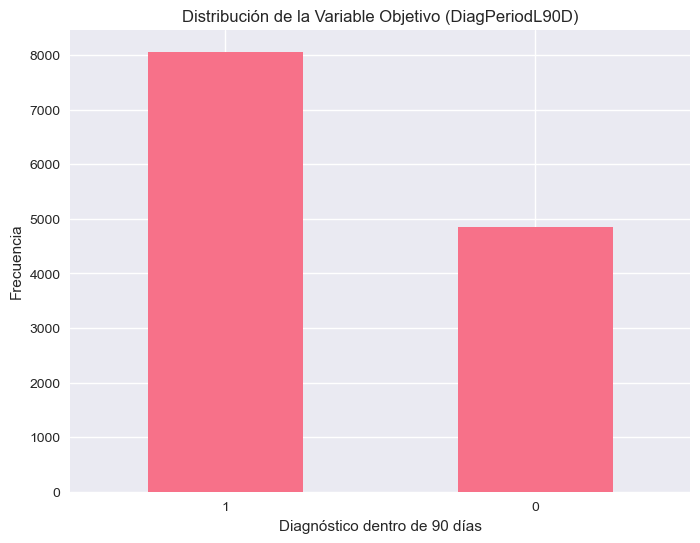

In [41]:
# Distribución de la variable objetivo
print("=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ===")
if 'DiagPeriodL90D' in train.columns:
    target_dist = train['DiagPeriodL90D'].value_counts(normalize=True) * 100
    print("Distribución de DiagPeriodL90D:")
    for value, pct in target_dist.items():
        print(f"  {value}: {pct:.2f}%")
    
    plt.figure(figsize=(8, 6))
    train['DiagPeriodL90D'].value_counts().plot(kind='bar')
    plt.title('Distribución de la Variable Objetivo (DiagPeriodL90D)')
    plt.xlabel('Diagnóstico dentro de 90 días')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    plt.show()

=== VISUALIZACIONES DE VARIABLES RELEVANTES ===


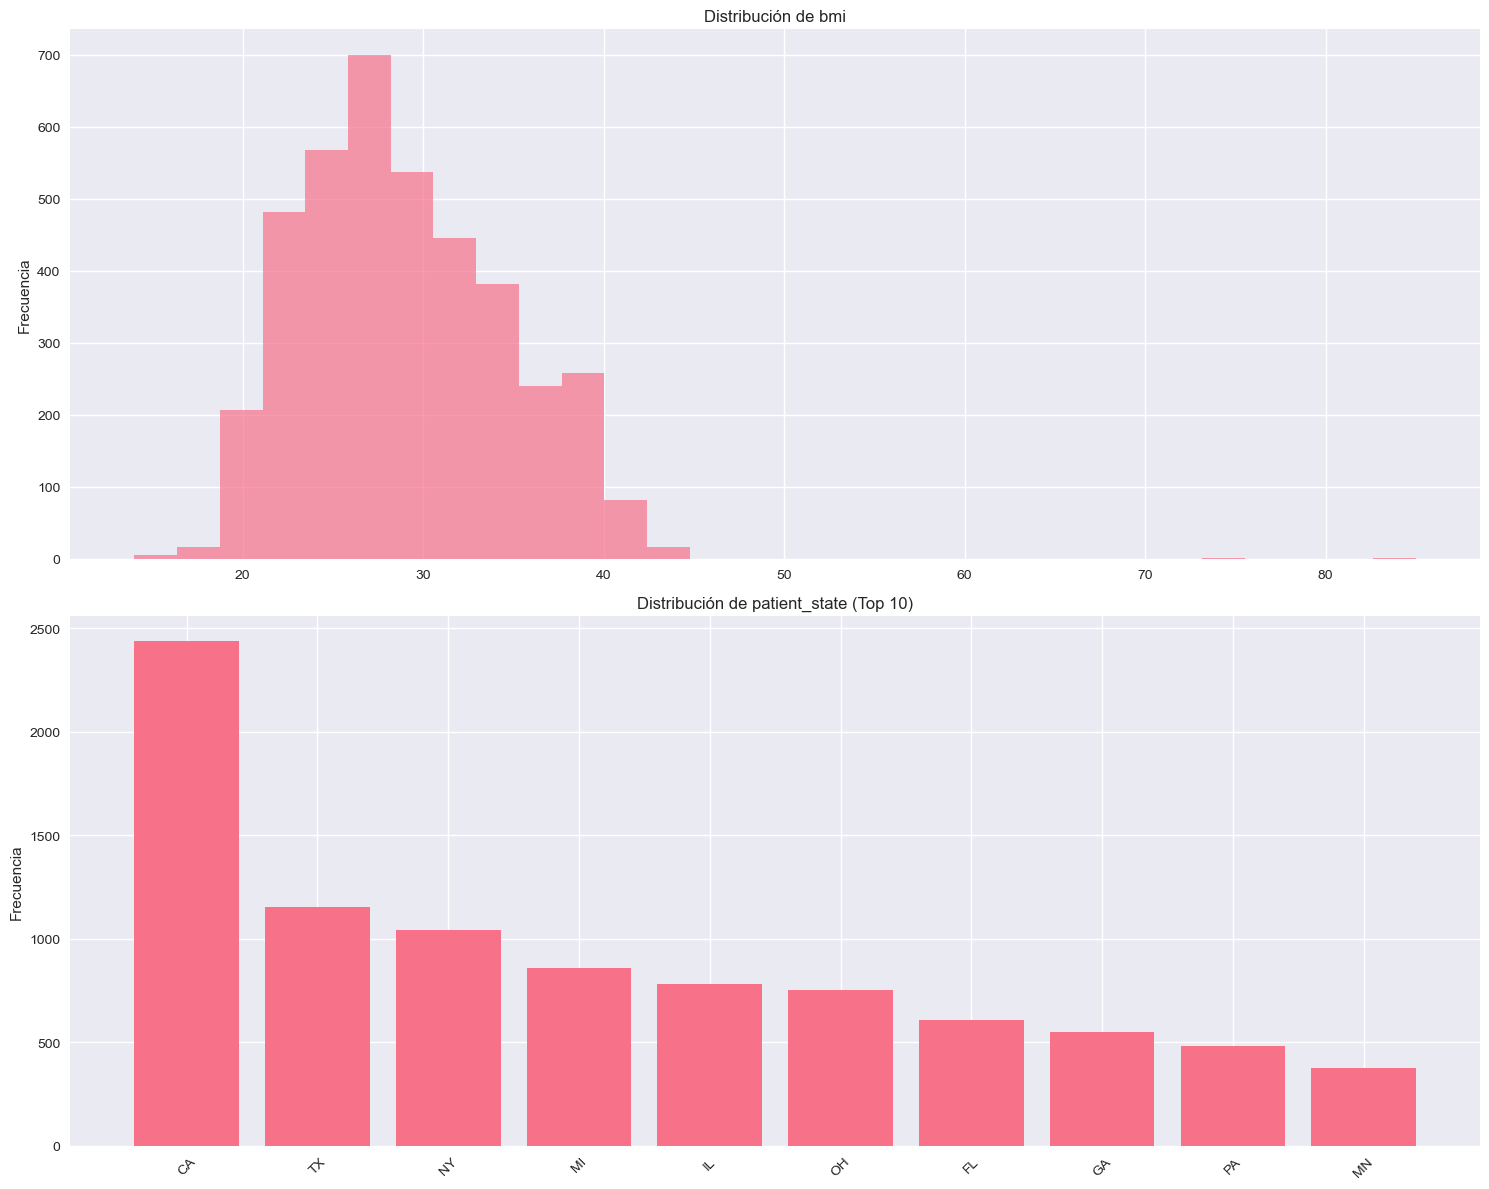

In [42]:
# Visualizaciones de variables relevantes
print("=== VISUALIZACIONES DE VARIABLES RELEVANTES ===")

# 1. Variables demográficas y de salud básicas
basic_vars = ['age', 'bmi', 'patient_state', 'Cancer_Code', 'Scheme_Code']
basic_vars = [var for var in basic_vars if var in train.columns]

fig, axes = plt.subplots(2, 1, figsize=(15, 12))
axes = axes.ravel()

for i, var in enumerate(basic_vars[:4]):
    if train[var].dtype == 'object':
        # Variables categóricas - mostrar top 10 categorías
        top_categories = train[var].value_counts().head(10)
        axes[i].bar(top_categories.index.astype(str), top_categories.values)
        axes[i].set_title(f'Distribución de {var} (Top 10)')
        axes[i].tick_params(axis='x', rotation=45)
    else:
        # Variables numéricas
        axes[i].hist(train[var].dropna(), bins=30, alpha=0.7)
        axes[i].set_title(f'Distribución de {var}')
    
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [43]:
# 
train.isna().sum()

patient_race      6385
payer_type        1803
patient_state       51
patient_zip3         0
patient_age          0
                  ... 
veteran              1
Ozone               29
PM25                29
N02                 29
DiagPeriodL90D       0
Length: 82, dtype: int64

In [44]:
#
categorical_columns = train.select_dtypes(include=['object']).columns
categorical_columns

Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object')

In [45]:
numerical_cols = train.select_dtypes(exclude=['object']).columns
numerical_cols

Index(['patient_zip3', 'patient_age', 'bmi', 'population', 'density',
       'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s',
       'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male',
       'female', 'married', 'divorced', 'never_married', 'widowed',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'income_individual_median', 'home_ownership', 'housing_units',
       'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
       'education_highschool', 'education_some_college', 'education_bachelors',
       'education_g

In [46]:
# Impute categorical columns using mode
for col in categorical_columns:
    if col != 'DiagPeriodL90D':
        mode = train[col].mode()[0]
        train.loc[:, col] = train[col].fillna(mode)
        test.loc[:, col] = test[col].fillna(mode)

In [47]:
# Impute numerical columns using mean
for col in numerical_cols:
    if col != 'DiagPeriodL90D':
        mean = train[col].median()
        train.loc[:, col] = train[col].fillna(mean)
        test.loc[:, col] = test[col].fillna(mean)

In [48]:
test['DiagPeriodL90D'] = 2
#combining the test and train dataset to perform EDA together, we will be later seperating them for training and testing
df = pd.concat([train,test])

In [49]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
for col in categorical_columns.to_list()+['patient_zip3']:       # patient_zip3 is a categorical column
    encoder.fit(df[[col]])
    
    # Transform both training and test data
    df[col] = encoder.transform(df[[col]])

In [50]:
cols = ['breast_cancer_diagnosis_code','metastatic_cancer_diagnosis_code','patient_zip3','patient_age','payer_type',
        'patient_state','breast_cancer_diagnosis_desc']

# Filter train and test data based on 'DiagPeriodL90D'
train = df[df['DiagPeriodL90D']!=2]
test = df[df['DiagPeriodL90D']==2].drop(columns=['DiagPeriodL90D']) 

Stratified K-fold Cross Validation Splitting

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

X = train[cols+['DiagPeriodL90D']].drop(columns=['DiagPeriodL90D'], axis=1)
y = train['DiagPeriodL90D']

# K-fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#for train_idx, test_idx in cv.split(X, y):
#     X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#     y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

Model Hyperparameter tuning

In [52]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier

def auc_scoring(estimator, X, y):
    predictions = estimator.predict_proba(X)[:, 1]
    return roc_auc_score(y, predictions)
    
# Define parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME'],
    'estimator': [DecisionTreeClassifier(max_depth=3)] 
}

# Use only the encoded features from the 'cols' list
X = train[cols]

# Create and run the grid search
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5, scoring=auc_scoring)
grid_search.fit(X, y)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best  AUC score:", grid_search.best_score_)

Best parameters: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1.0, 'n_estimators': 100}
Best  AUC score: 0.80207391242561


Generamos predicciones 

In [53]:
# Use the best model for prediction
best_model = grid_search.best_estimator_
# predictions = best_model.predict(X_test)
# predictions

preds_test_ada = best_model.predict_proba(test[cols])[:, 1]
preds_test_ada

array([0.61201497, 0.58544989, 0.59589288, ..., 0.68510672, 0.33510097,
       0.6677813 ])

In [54]:
#
submission = pd.read_csv("C:\\Users\\GIOSAPHAT\\Documents\\python_proyects\\topicos_II\\data\\sample_submission.csv")
predictions = preds_test_ada[:len(submission)]
submission['DiagPeriodL90D'] = predictions
submission.to_csv('submission_.csv', index=False)
submission

,patient_id,DiagPeriodL90D
0,573710,0.612015
1,593679,0.585450
2,184532,0.595893
3,447383,0.619542
4,687972,0.635718
...,...,...
5787,977076,0.630878
5788,922960,0.650484
5789,759690,0.685107
5790,911717,0.335101


In [55]:
print("=== VERIFICACIÓN FINAL ===")
print(f"Número de predicciones generadas: {len(preds_test_ada)}")
print(f"Número de filas en test: {len(test)}")
print(f"Número de filas en submission: {len(submission)}")
print(f"Primeras 5 predicciones: {preds_test_ada[:5]}")
print(f"Últimas 5 predicciones: {preds_test_ada[-5:]}")
#print(f"\n Archivo 'submission_.csv' creado exitosamente")
print(f"   - Tamaño: {len(submission)} filas")
print(f"   - Rango de predicciones: [{preds_test_ada.min():.4f}, {preds_test_ada.max():.4f}]")

=== VERIFICACIÓN FINAL ===
Número de predicciones generadas: 5792
Número de filas en test: 5792
Número de filas en submission: 5792
Primeras 5 predicciones: [0.61201497 0.58544989 0.59589288 0.61954176 0.63571844]
Últimas 5 predicciones: [0.63087828 0.65048386 0.68510672 0.33510097 0.6677813 ]
   - Tamaño: 5792 filas
   - Rango de predicciones: [0.2402, 0.8542]
